In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from pylab import rcParams
from math import pi
% matplotlib inline

Для работы выбрано распределение Рэлея:
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F

Плотность распределения Рэлея:
$$p(x, r) = \frac{x}{r^2}exp(-\frac{x^2}{2r^2})$$
Согласно Википедии, формулы для вычисления матожидания M и дисперсии D распределения Рэлея имеют вид:

(1)     $$M=\sqrt{\frac{\pi}{2}}r$$     
(2)     $$D =(2-\frac{\pi}{2})r^2$$     

In [48]:
#параметр распределения
r = 1

#вычисление теоретических мат. ожидания и среднеквадратического отклонения, согласно формулам (1), (2)
M = r*(pi/2.)**0.5
#учитываем, что СКО - корень из дисперсии
sigma = ((2.-pi/2.)*r**2)**0.5

#согласно документации scipy распределение Рэлея с параметром r=1 задается следующим образом
R = sts.rayleigh(0,1)


Text(0.5,0,'$x$')

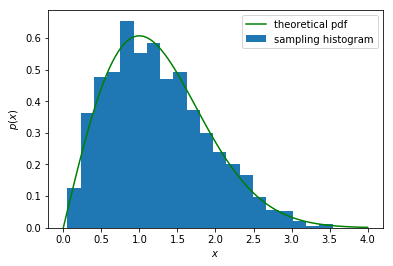

In [51]:
x = np.linspace(0,4,100)

#генерация выборки n =1000
sample = R.rvs(1000)

#гистограмма распределения
plt.hist(sample, bins =20, density = 'True', label = 'sampling histogram')

#теоретическая плотность распределения
pdf = R.pdf(x)
plt.plot(x, pdf, label = 'theoretical pdf', color = 'green')
plt.legend()
plt.ylabel('$p(x)$')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

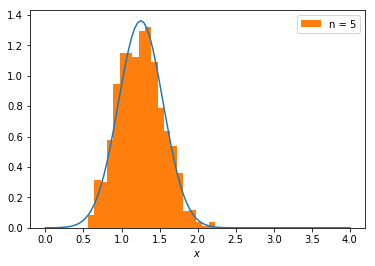

In [54]:
n1 = 5
#генерация 1000 выборок с n = 5
M_5 = R.rvs(size = (1000,n1))

#вычисление массива выборочных средних
range1 = np.mean(M_5, axis = 1)

#нормальное распределение с матожиданием и СКО, полученными теоретически по ф-лам (1), (2)
ND1 = sts.norm(loc = M, scale = sigma/(n1**0.5))
NPDF1 = ND1.pdf(x)

#построение графиков
plt.plot(x, NPDF1)
plt.hist(range1, bins =20, density = 'True', label = 'n = 5')
plt.legend()

plt.xlabel('$x$')

Далее учитываем, что по ЦПТ

(3) $$\overline{X_n} = \sim N(M(X),\frac{D(X)}{n})$$

Text(0.5,0,'$x$')

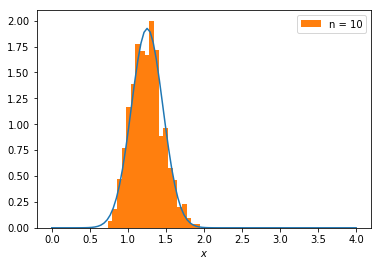

In [63]:
n2 = 10
#генерация 1000 выборок с n = 10
M_10 = R.rvs(size = (1000,n2))

#вычисление массива выборочных средних
range2 = np.mean(M_10, axis = 1)

#нормальное распределение с матожиданием и СКО, полученными теоретически по ф-лам (1), (2)
ND2 = sts.norm(loc = M, scale = sigma/(n2**0.5))
NPDF2 = ND2.pdf(x)

#построение графиков
plt.plot(x, NPDF2)
plt.hist(range2, bins =20, density = 'True', label = 'n = 10')
plt.legend()
         
plt.xlabel('$x$')

Text(0.5,0,'$x$')

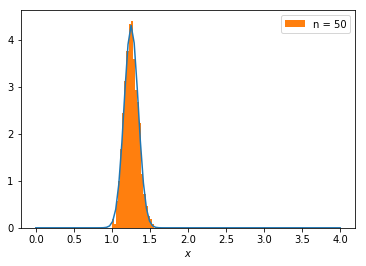

In [64]:
n3 = 50

#генерация 1000 выборок с n = 50
M_50 = R.rvs(size = (1000,n3))

#вычисление массива выборочных средних
range3 = np.mean(M_50, axis = 1)

#нормальное распределение с матожиданием и СКО, полученными теоретически по ф-лам (1), (2)
ND3 = sts.norm(loc = M, scale = sigma/(n3**0.5))
NPDF3 = ND3.pdf(x)

#построение графиков
plt.plot(x, NPDF3)
plt.hist(range3, bins =20, density = 'True', label = 'n = 50')
plt.legend()

plt.xlabel('$x$')

Вывод: при увеличении n имеет место лучшая сходимость к нормальному распределению
